<h2>Exploratory Data Analysis (EDA)</h2>

<p>Before diving into deep learning model development, it is crucial to understand the dataset through 
    <span class='highlight'>Exploratory Data Analysis (EDA)</span>. This notebook focuses on analyzing the dataset, 
       identifying patterns, handling missing values, and visualizing key features.
</p>

<p><b>The main objectives of this EDA are:</b></p>

<ul>
      <li>Understand the structure and characteristics of the dataset</li>
      <li>Identify missing values and data inconsistencies</li>
      <li>Perform statistical analysis of features</li>
      <li>Visualize distributions and relationships between variables</li>
</ul>

<p>This analysis will provide insights that guide feature engineering and model selection in the subsequent deep learning stages.</p>

<p class='footer'>📊 Let's explore the data!</p>

In [33]:
import importlib.util
file_path = "D:\Repositories\DL_PP\src\churn_function.py"
spec = importlib.util.spec_from_file_location("churn_function", file_path)
churn_function = importlib.util.module_from_spec(spec)
spec.loader.exec_module(churn_function)

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [35]:
file_path = "D:\Repositories\DL_PP\data\external\Churn.csv"
df = churn_function.import_data(file_path)

In [36]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [37]:
df_important = df.drop(columns=["RowNumber", "CustomerId", "Surname"])

In [38]:
df_important.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [39]:
df_encoded = pd.get_dummies(df_important, columns=["Gender", "Geography"], drop_first=True).astype(int)

In [40]:
df_encoded.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male,Geography_Germany,Geography_Spain
0,619,42,2,0,1,1,1,101348,1,0,0,0
1,608,41,1,83807,1,0,1,112542,0,0,0,1
2,502,42,8,159660,3,1,0,113931,1,0,0,0
3,699,39,1,0,2,0,0,93826,0,0,0,0
4,850,43,2,125510,1,1,1,79084,0,0,0,1


In [41]:
X = df_encoded.drop(columns=["Exited"])
y = df_encoded["Exited"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [43]:
X_train = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X.columns)

print("Train set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Train set shape: (8000, 11) (8000,)
Test set shape: (2000, 11) (2000,)


In [44]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [45]:
classfier = Sequential()

#Input layer and first hidden layer
classfier.add(Dense(units=6, kernel_initializer = 'uniform', activation='relu', input_dim=11))
#Second hidden layer
classfier.add(Dense(units=6, kernel_initializer = 'uniform', activation='relu'))
#Output Layer
classfier.add(Dense(units=1, kernel_initializer = 'uniform', activation='sigmoid'))

#Training model
classfier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
hist = classfier.fit(X_train, y_train, validation_split= 0.3, epochs = 100)


Epoch 1/100


d:\Repositories\DL_PP\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7772 - loss: 0.6682 - val_accuracy: 0.7887 - val_loss: 0.5052
Epoch 2/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7971 - loss: 0.4688 - val_accuracy: 0.7887 - val_loss: 0.4436
Epoch 3/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 876us/step - accuracy: 0.7964 - loss: 0.4328 - val_accuracy: 0.8171 - val_loss: 0.4366
Epoch 4/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 947us/step - accuracy: 0.8192 - loss: 0.4131 - val_accuracy: 0.8217 - val_loss: 0.4329
Epoch 5/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 905us/step - accuracy: 0.8177 - loss: 0.4207 - val_accuracy: 0.8242 - val_loss: 0.4303
Epoch 6/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 885us/step - accuracy: 0.8236 - loss: 0.4083 - val_accuracy: 0.8258 - val_loss: 0.4273
Epoch 7/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 972us/step - accuracy: 0.8333 - loss: 0.4016 - val_accuracy: 0.8292 - val_loss: 0.4260
Epoch 8/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 920us/step - accuracy: 0.8326 - loss: 0.4049 - val_accu

In [46]:
# Predicting the Test set results
y_pred = classfier.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 700us/step


In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

array([[1538,   69],
       [ 258,  135]])

In [48]:
# Print Statistics from Confusion Matrix
from sklearn.metrics import classification_report
target_names = ['Stay', 'Leave']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

        Stay       0.86      0.96      0.90      1607
       Leave       0.66      0.34      0.45       393

    accuracy                           0.84      2000
   macro avg       0.76      0.65      0.68      2000
weighted avg       0.82      0.84      0.82      2000



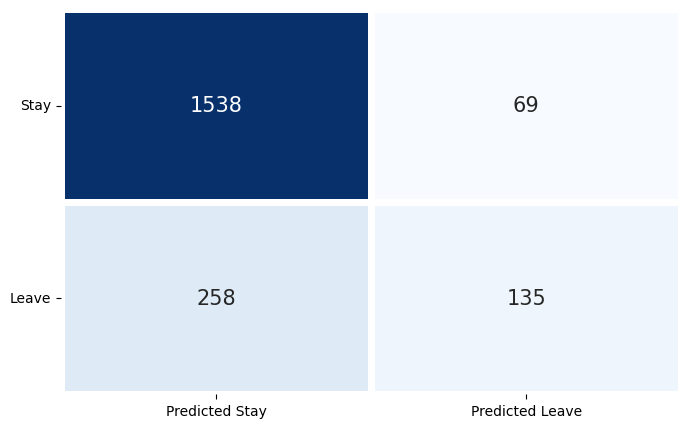

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
# Visualizing Confusion Matrix
plt.figure(figsize = (8, 5))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['Stay', 'Leave'], xticklabels = ['Predicted Stay', 'Predicted Leave'])
plt.yticks(rotation = 0)
plt.show()

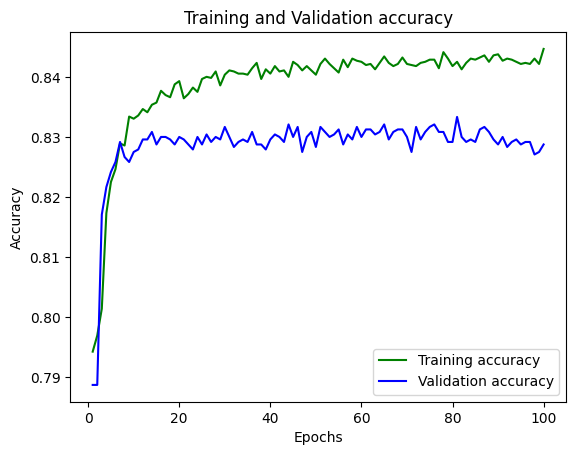

In [50]:
loss_train = hist.history['accuracy']
loss_val = hist.history['val_accuracy']
epochs = range(1,101)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

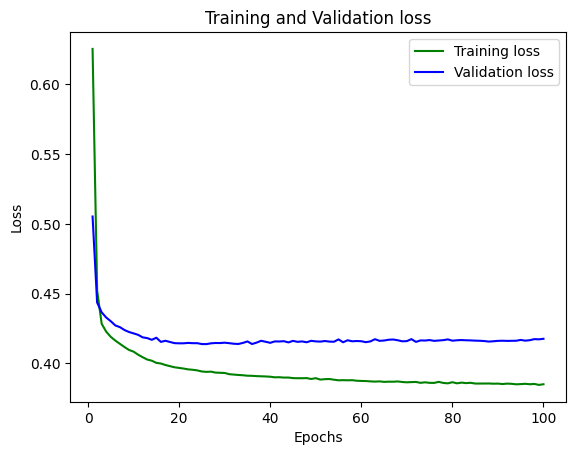

In [51]:
loss_train = hist.history['loss']
loss_val = hist.history['val_loss']
epochs = range(1,101)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()